### Steps
#### 1- Import necessary libraries
#### 2- Read and explore the dataset
#### 3- Build a model using PassiveAggressiveClassifier
#### 4- Evaluate the model's accuracy

In [1]:
pip install numpy pandas sklearn


Note: you may need to restart the kernel to use updated packages.


#### 1- Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

#### 2- Read and explore the dataset

In [4]:
news_data= pd.read_csv("news.csv")
news_data.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [5]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [6]:
news_data.shape

(6335, 4)

In [7]:
news_data["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [8]:
labels= news_data.label
labels.head(10)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
5    FAKE
6    FAKE
7    REAL
8    REAL
9    REAL
Name: label, dtype: object

#### 3- Build the model

In [11]:
#First, we split the dataset into train & test samples:
x_train, x_test, y_train, y_test= train_test_split(news_data["text"], labels, test_size= 0.4, random_state= 7)

In [12]:
#Then we’ll initialize TfidfVectorizer with English stop words

vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7) 
#The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.

tfidf_train=vectorizer.fit_transform(x_train) 
tfidf_test=vectorizer.transform(x_test)

### max_df & min_df
#### max_df is used for removing terms that appear too frequently, also known as "corpus-specific stop words". For example:
#### max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
#### max_df = 25 means "ignore terms that appear in more than 25 documents".
#### The default max_df is 1.0, which means "ignore terms that appear in more than 100% of the documents". Thus, the default setting does not ignore any terms.

#### min_df is used for removing terms that appear too infrequently. For example:

#### min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
#### min_df = 5 means "ignore terms that appear in less than 5 documents".
#### The default min_df is 1, which means "ignore terms that appear in less than 1 document". Thus, the default setting does not ignore any terms.

### 1- Term Frequency (tf) 
#### tf is the number of times a term appears in a particular document. So it’s specific to a document. A few of the ways to calculate tf is given below:-
#### tf(t) = No. of times term ‘t’ occurs in a document

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 2- Inverse Document Frequency (idf)
#### idf is a measure of how common or rare a term is across the entire corpus of documents. So the point to note is that it’s common to all the documents. If the word is common and appears in many documents, the idf value (normalized) will approach 0 or else approach 1 if it’s rare.
#### idf(t) = log e [ (1+n) / ( 1 + df(t) ) ] + 1 (default i:e smooth_idf = True)

#### and

#### idf(t) = log e [ n / df(t) ] + 1 (when smooth_idf = False)

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 3- Term Frequency-Inverse Document Frequency (tf-idf)
#### tf-idf value of a term in a document is the product of its tf and idf. The higher is the value, the more relevant the term is in that document.

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Passive-Aggressive Classifier
#### Passive-Aggressive algorithms are generally used for large-scale learning. It is one of the few ‘online-learning algorithms‘. In online machine learning algorithms, the input data comes in sequential order and the machine learning model is updated step-by-step, as opposed to batch learning, where the entire training dataset is used at once. This is very useful in situations where there is a huge amount of data and it is computationally infeasible to train the entire dataset because of the sheer size of the data. We can simply say that an online-learning algorithm will get a training example, update the classifier, and then throw away the example.

#### A very good example of this would be to detect fake news on a social media website like Twitter, where new data is being added every second. To dynamically read data from Twitter continuously, the data would be huge, and using an online-learning algorithm would be ideal.

#### Passive-Aggressive algorithms are called so because :

#### Passive: If the prediction is correct, keep the model and do not make any changes. i.e., the data in the example is not enough to cause any changes in the model. 
#### Aggressive: If the prediction is incorrect, make changes to the model. i.e., some change to the model may correct it.

In [15]:
#Create a PassiveAggressiveClassifier and fit it on tfidf_train and y_train.
passive=PassiveAggressiveClassifier(max_iter=50) 
#max_iter : The maximum number of iterations the model makes over the training data.

passive.fit(tfidf_train,y_train)
#'tfidf_train' is the (x) after removing all unnecessary words and being transformed by the vectorizer
#'y_train' is the (y) which is the labels: fake, real
#we’ll predict on the test set from the TfidfVectorizer

y_pred=passive.predict(tfidf_test)

In [16]:
y_pred

array(['REAL', 'FAKE', 'REAL', ..., 'FAKE', 'FAKE', 'REAL'], dtype='<U4')

#### 4- Evaluate the model's accuracy

In [19]:
#Create a confusion matrix
matrix= confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
matrix

array([[1184,   86],
       [  88, 1176]], dtype=int64)

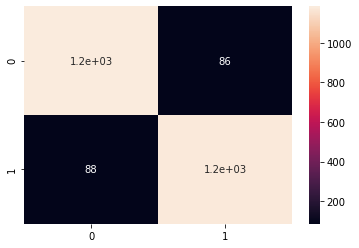

In [20]:
#Visualize the confusion matrix
sns.heatmap(matrix, annot=True)
plt.show()

In [21]:
#Calculate the model's accuracy
Accuracy=accuracy_score(y_test,y_pred)
Accuracy*100

93.1333859510655

#### The model's accuracy is 93%

In [22]:
Report= classification_report(y_test, y_pred)
print(Report)

              precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93      1270
        REAL       0.93      0.93      0.93      1264

    accuracy                           0.93      2534
   macro avg       0.93      0.93      0.93      2534
weighted avg       0.93      0.93      0.93      2534

